# Recurrent learning

In this file the network is working with a feedback, online learning is used to make a correction when it might exagerates. 

In [28]:
from data_loading import load_X_Y, plot_results
import numpy as np 
import matplotlib.pyplot as plt 
dpath = '../datasets/preprocessed/'
file_name = 'A146020302.csv'

In [29]:
from reservoirpy.datasets import to_forecasting
def normalize_data(data):
    # Normalizing data between 0 and 1 column by column
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data, min_vals, max_vals

data = load_X_Y(dpath + file_name)
data, min_vals, max_vals = normalize_data(data)
x,y= to_forecasting(data[3156:], forecast=7)
y = y[:, -1].reshape(-1, 1) # chosing the data that will be used (electricity consuption)
units = 1500 
leak_rate = 0.7792508169512387
spectral_radius = .09321853131680612
input_scaling = .7
connectivity = 0.02
input_connectivity = 0.3
regularization = 1e-1
seed = 42
X_train1, y_train1 = x[:2000], y[:2000]
X_test1, y_test1 = x[2000:], y[2000:]
X_test1 = np.asarray(X_test1) # chosing the data that will be used (electricity consuption)
X_test1 = X_test1.reshape(X_test1.shape[0], -1) # reshaping data that they could be used by reservoir py

In [30]:
from reservoirpy.nodes import RLS
from reservoirpy.nodes import Reservoir 
reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)

readout   = RLS(1.7612623782375254)


esn_online = reservoir >> readout

In [31]:
readout = RLS(1.7612623782375254)
outputs_pre = np.zeros((len(X_train1), 1))

for t, (x_t, y_t) in enumerate(zip(X_train1, y_train1)):
    outputs_pre[t] = esn_online.partial_fit(
        x_t.reshape(1, -1),
        y_t.reshape(1, -1)
    )

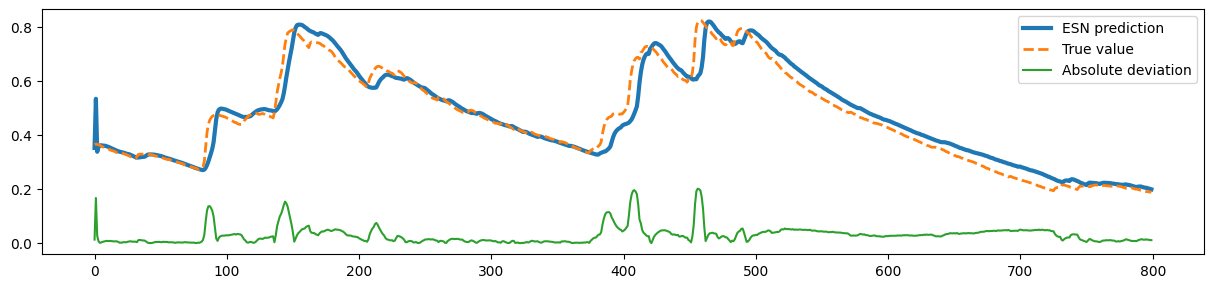

In [32]:
plot_results(outputs_pre, y_train1,800)

In [33]:

esn_online = reservoir >> readout
esn_online.partial_fit(X_train1, y_train1)
pred_online = esn_online.run(X_test1)

Écart entre moyenne prédiction et moyenne valeur réelle -0.03060243913319193


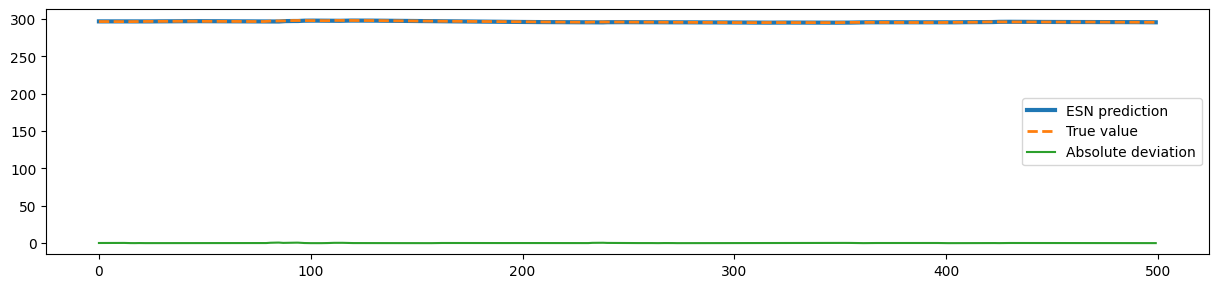

In [35]:
def unnormalize_data(normalized_data, min_vals, max_vals):
    return normalized_data * (max_vals - min_vals) + min_vals


pred_data = unnormalize_data(pred_online, min_vals[-1], max_vals[-1])
y_test_data = unnormalize_data(y_test1, min_vals[-1], max_vals[-1])
print( "Écart entre moyenne prédiction et moyenne valeur réelle", np.mean(y_test_data - pred_data))
plot_results(pred_data[200:],y_test_data[200:], sample=500)
